<a href="https://colab.research.google.com/github/sridevi0323/Animal-Hide---DL/blob/main/AlexNet_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Specify the path to your desired directory
path_to_directory = '/content/drive/MyDrive/Leather_Dataset'

# Change the working directory to the specified path
os.chdir(path_to_directory)

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Check if GPU is available and set it as the runtime
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("No GPU available. Switch to a GPU runtime in Google Colab.")


No GPU available. Switch to a GPU runtime in Google Colab.


In [ ]:
# Define the directories for your dataset
train_dir = '/content/drive/MyDrive/Leather_Dataset'  # Replace with the path to your training dataset
test_dir = '/content/drive/MyDrive/Leather_Dataset'    # Replace with the path to your test dataset

# Set parameters for data augmentation and preprocessing
train_data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_data_gen = ImageDataGenerator(rescale=1./255)

# Create generators for loading and augmenting images
batch_size = 32
train_generator = train_data_gen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
test_generator = test_data_gen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=batch_size, class_mode='categorical')


Found 1200 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.


In [ ]:
  model = Sequential()

  # Convolutional layers
  model.add(Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
  model.add(Conv2D(256, kernel_size=(5, 5), activation='sigmoid'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
  model.add(Conv2D(384, kernel_size=(3, 3), activation='relu'))
  model.add(Conv2D(384, kernel_size=(3, 3), activation='sigmoid'))
  model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

  # Fully connected layers
  model.add(Flatten())
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(2, activation='softmax'))  # Assuming two classes (healthy skin and vitiligo)

  model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])


In [ ]:
epochs = 20
history = model.fit(train_generator, steps_per_epoch=train_generator.samples // batch_size, epochs=epochs, validation_data=test_generator, validation_steps=test_generator.samples // batch_size)


Epoch 1/20
37/37 [==============================] - 257s 7s/step - loss: 0.8961 - accuracy: 0.4743 - val_loss: 0.6935 - val_accuracy: 0.5008
Epoch 2/20
37/37 [==============================] - 144s 4s/step - loss: 0.6945 - accuracy: 0.4897 - val_loss: 0.6934 - val_accuracy: 0.5008
Epoch 3/20
37/37 [==============================] - 161s 4s/step - loss: 0.6936 - accuracy: 0.4914 - val_loss: 0.6933 - val_accuracy: 0.4975
Epoch 4/20
37/37 [==============================] - 160s 4s/step - loss: 0.6937 - accuracy: 0.4854 - val_loss: 0.6932 - val_accuracy: 0.5017
Epoch 5/20
37/37 [==============================] - 158s 4s/step - loss: 0.6934 - accuracy: 0.4872 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/20
37/37 [==============================] - 158s 4s/step - loss: 0.6936 - accuracy: 0.4889 - val_loss: 0.6931 - val_accuracy: 0.5017
Epoch 7/20
37/37 [==============================] - 160s 4s/step - loss: 0.6942 - accuracy: 0.4991 - val_loss: 0.6931 - val_accuracy: 0.5025
Epoch 8/20
37

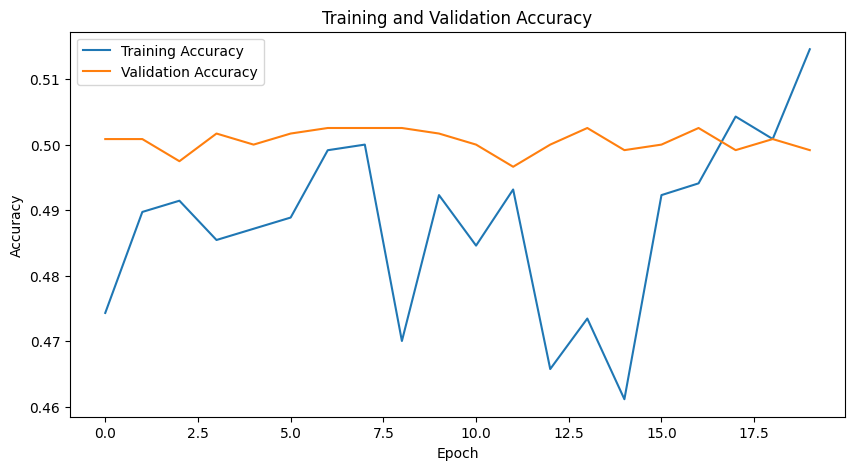

In [ ]:
# Plot the accuracy graph
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


38/38 [==============================] - 42s 1s/step


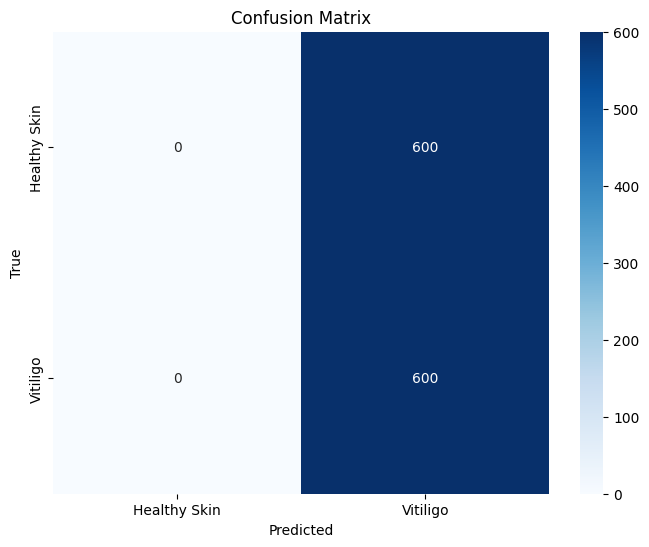

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test data
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true class labels from the test generator
true_classes = test_generator.classes

# Compute the confusion matrix
confusion_mtx = confusion_matrix(true_classes, predicted_classes)

# Create a function to display the confusion matrix as a heatmap
def plot_confusion_matrix(confusion_mtx, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Define class labels (assuming two classes: healthy skin and vitiligo)
class_labels = ['Healthy Skin', 'Vitiligo']

# Display the confusion matrix
plot_confusion_matrix(confusion_mtx, class_labels)


1/1 [==============================] - 1s 591ms/step


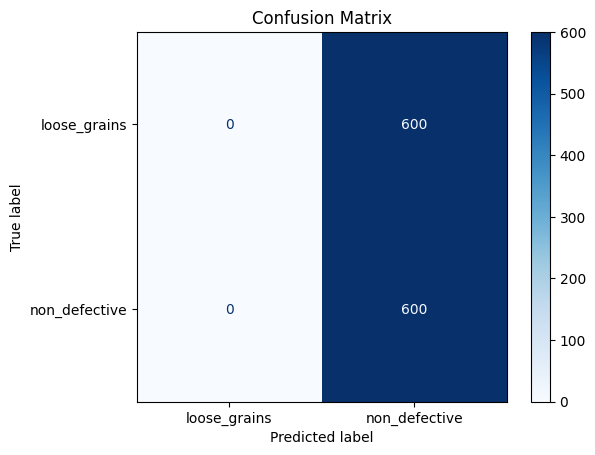

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ... (rest of your code)

# Train your model (as you've already done)

# Evaluate the model and get the true labels and predicted labels
true_labels = []
predicted_labels = []

for batch in test_generator:
    images, labels = batch
    true_labels.extend(np.argmax(labels, axis=1))
    predicted_labels.extend(np.argmax(model.predict(images), axis=1))
    if len(true_labels) >= test_generator.samples:
        break

# Convert the lists to NumPy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
labels = ['loose_grains', 'non_defective']  # Replace with your actual class labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


1/1 [==============================] - 0s 327ms/step


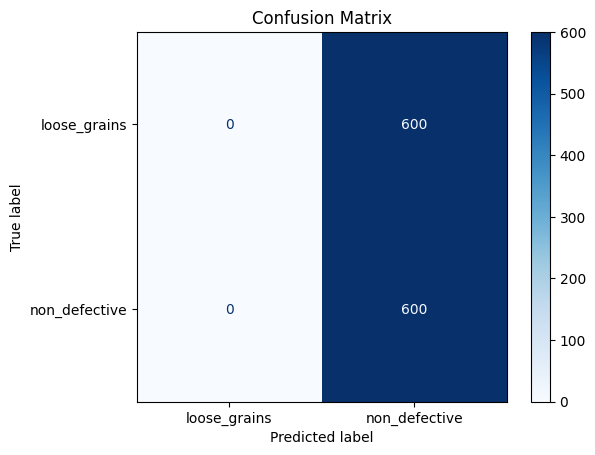

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ... (rest of your code)

# Train your model (as you've already done)

# Evaluate the model and get the true labels and predicted labels
true_labels = []
predicted_labels = []

for batch in test_generator:
    images, labels = batch
    true_labels.extend(np.argmax(labels, axis=1))
    predicted_labels.extend(np.argmax(model.predict(images), axis=1))
    if len(true_labels) >= test_generator.samples:
        break

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
labels = ['loose_grains', 'non_defective']  # Replace with your actual class labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Evaluating Metrices

TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

# calculate mis-classification
conf_misclassification = 1- conf_accuracy

# calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))
# calculate the specificity
conf_specificity = (TN / float(TN + FP))

# calculate precision
conf_precision = (TN / float(TN + FP))
# calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,2)}')
print(f'Mis-Classification: {round(conf_misclassification,2)}')
print(f'Sensitivity: {round(conf_sensitivity,2)}')
print(f'Specificity: {round(conf_specificity,2)}')
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')

True Positives: 600
True Negatives: 0
False Positives: 600
False Negatives: 0
--------------------------------------------------
Accuracy: 0.5
Mis-Classification: 0.5
Sensitivity: 1.0
Specificity: 0.0
Precision: 0.0
f_1 Score: 0.0
